In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

#1.Data Collection/Processing

In [ ]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,27/10/2020 21:24,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,27/10/2020 14:03,"Please note that from checking our records, yo...",27/10/2020 15:05,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,27/10/2020 08:18,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,26/10/2020 13:28,What do you find troublesome about the update?...,26/10/2020 14:58,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,26/10/2020 06:10,NaN,NaN,newest,com.anydo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df.shape
     )

(12495, 12)


##2.Visualization techniques

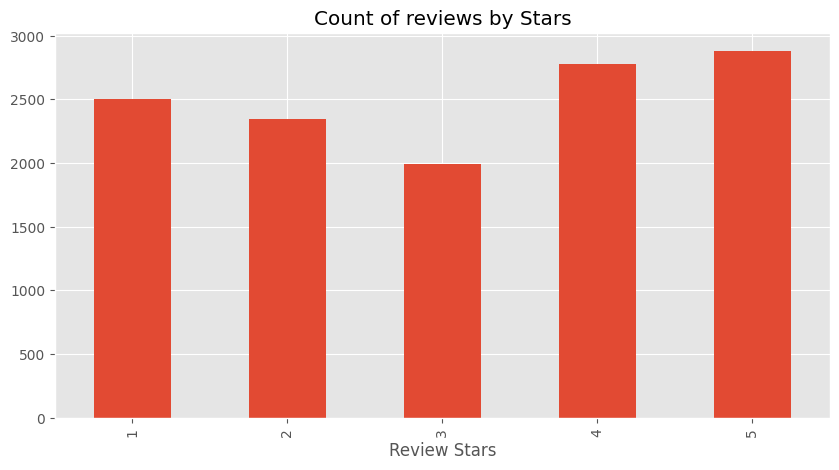

In [ ]:
ax = df['score'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

###3.Basic NLTK

In [ ]:
#basic nltk
example = df['content'][50]
print(example)

Subscription?? How does this application figure that it can be a subscription application? Ridiculous Update after developer response: This is not a subscription application. You are not Netflix or Adobe. This should be a standalone app quit trying to milk people's money. You can say anything you want. THIS WILL NEVER BE A SUBSCRIPTION APPLICATION. STOP BEING RIDICULOUS.



 Tokenization

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Subscription',
 '?',
 '?',
 'How',
 'does',
 'this',
 'application',
 'figure',
 'that',
 'it']

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Parts of Speech Tag

In [ ]:
tagged = nltk.pos_tag(tokens)

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Subscription/NN)
  ?/.
  ?/.
  How/WRB
  does/VBZ
  this/DT
  application/NN
  figure/NN
  that/IN
  it/PRP
  can/MD
  be/VB
  a/DT
  subscription/NN
  application/NN
  ?/.
  Ridiculous/JJ
  Update/NNP
  after/IN
  developer/JJ
  response/NN
  :/:
  This/DT
  is/VBZ
  not/RB
  a/DT
  subscription/NN
  application/NN
  ./.
  You/PRP
  are/VBP
  not/RB
  (PERSON Netflix/NNP)
  or/CC
  (GPE Adobe/NNP)
  ./.
  This/DT
  should/MD
  be/VB
  a/DT
  standalone/NN
  app/NN
  quit/NN
  trying/VBG
  to/TO
  milk/VB
  people/NNS
  's/POS
  money/NN
  ./.
  You/PRP
  can/MD
  say/VB
  anything/NN
  you/PRP
  want/VBP
  ./.
  THIS/NNP
  WILL/MD
  NEVER/NNP
  BE/VB
  A/NNP
  SUBSCRIPTION/NNP
  APPLICATION/NNP
  ./.
  STOP/NNP
  BEING/NNP
  RIDICULOUS/NNP
  ./.)


In [ ]:
 nltk.download('words')


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
 nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

####4.VADER Sentiment scoring
the use of bag of words approach each word scored and combined to a total score

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
#run the polarity score on the entire dataset
#res = {}
#for index, row in tqdm(df.iterrows()):
    #text = row['content']
    #myid = row['reviewId']
    #res[myid] = sia.polarity_scores(text)
    #break
res = {}
for row in tqdm(df.itertuples(index=False)):
    text = row.content
    myid = row.reviewId
    res[myid] = sia.polarity_scores(text)


0it [00:00, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'reviewId'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders

,reviewId,neg,neu,pos,compound,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,0.000,1.000,0.000,0.0000,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,27/10/2020 21:24,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,0.000,1.000,0.000,0.0000,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,27/10/2020 14:03,"Please note that from checking our records, yo...",27/10/2020 15:05,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,0.042,0.809,0.149,0.6597,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,27/10/2020 08:18,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,0.202,0.772,0.026,-0.8576,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,26/10/2020 13:28,What do you find troublesome about the update?...,26/10/2020 14:58,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,0.000,1.000,0.000,0.0000,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,26/10/2020 06:10,NaN,NaN,newest,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,0.000,0.779,0.221,0.6893,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,21/12/2018 00:13,NaN,NaN,newest,com.appxy.planner
12491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,0.000,1.000,0.000,0.0000,Roaring Grizzly Bear,https://play-lh.googleusercontent.com/a-/AOh14...,😁****😁,5,0,NaN,12/12/2018 21:52,NaN,NaN,newest,com.appxy.planner
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,0.000,0.653,0.347,0.4927,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,11/12/2018 15:49,NaN,NaN,newest,com.appxy.planner
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,0.049,0.699,0.252,0.7778,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,06/12/2018 04:59,NaN,NaN,newest,com.appxy.planner


PLot VADER results

Text(0.5, 1.0, 'Compound score by Amazon review')

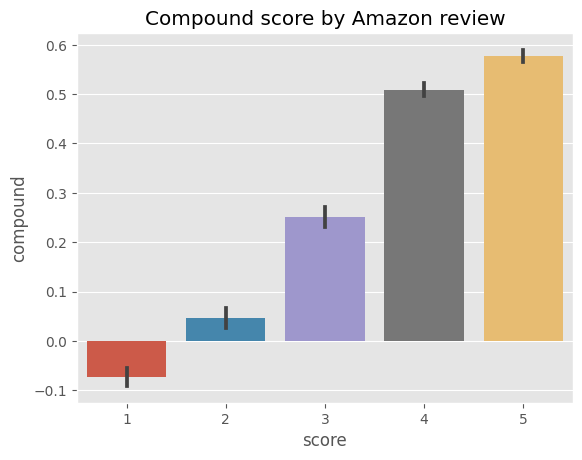

In [ ]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compound score by Amazon review')

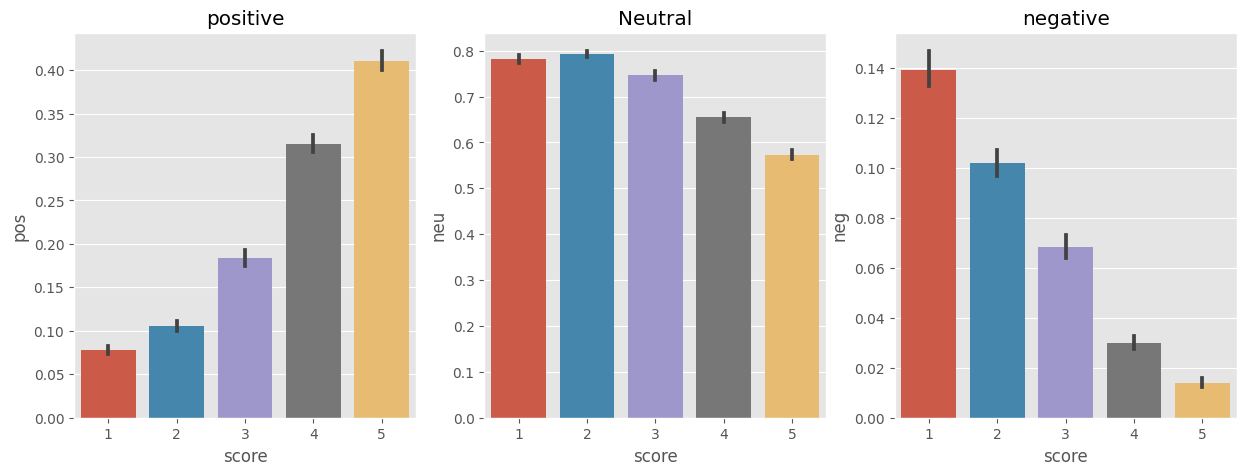

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data= vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data= vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data= vaders, x='score', y='neg', ax=axs[2])

axs[0].set_title('positive')
axs[1].set_title('Neutral')
axs[2].set_title('negative')

plt.show()

##### Huggingface Transformers
Roberta model

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
#vader results on examples
print(example)
sia.polarity_scores(example)

Subscription?? How does this application figure that it can be a subscription application? Ridiculous Update after developer response: This is not a subscription application. You are not Netflix or Adobe. This should be a standalone app quit trying to milk people's money. You can say anything you want. THIS WILL NEVER BE A SUBSCRIPTION APPLICATION. STOP BEING RIDICULOUS.


{'neg': 0.152, 'neu': 0.826, 'pos': 0.021, 'compound': -0.8362}

In [ ]:
#run the Roberta model
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' :scores[0],
      'roberta_neu' :scores[1],
      'roberta_pos' :scores[2],
  }
  return scores_dict

In [ ]:
res = {}
for row in tqdm(df.itertuples(index=False)):
  try:
    text = row.content
    myid = row.reviewId
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    res[myid] = both
  except RuntimeError:
      print(f'Broke for id {myid}')


0it [00:00, ?it/s]

Broke for id gp:AOqpTOG-yLPXe4GxbSsDa2aUT2vBKCQYLGM-bSAfJDOepGOYjYURfPekdhXKentQfnzyo2PwtTOPVFZ3WtlrHa0
Broke for id gp:AOqpTOEsSp_4QOhxbTIu3fEpWxiOIYFE3t4XmkTqmRZMGHGQ1uV427CsmyH4Vy6vzu7cWARTkkdUooe1hZgTxg
Broke for id gp:AOqpTOEKDIPD9FWPqz5HvglBU1f1h82MiHfkPjkcQjdP0b7phBynBAU0BaYhP79cR_VcajqcDXkdob07WolVWQ
Broke for id gp:AOqpTOFW67J6jJDlFWahpUDDExopgYL5PTYfvCvqbit0wUIW-kmw_zm_-ILPPcBxupNc2o6KNzm0tDARANkl
Broke for id gp:AOqpTOH6_huL2kpzlzPl3DelNWIhiy3DAB8KYFgplZ9v0O5I6H7lrLHYWFxJDKiQ6oxxxLlTV7SFkXKLot53
Broke for id gp:AOqpTOE9t1H9W90Kzu-jCJ17yOCr6B_fzqQ7sbcSfTX2SS3E8UInHHc1PUdY1CJdCAC0Kujnts3vL7aP9WF1HXQ


In [ ]:
both

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'reviewId'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')

KeyError: 'vader_neg'

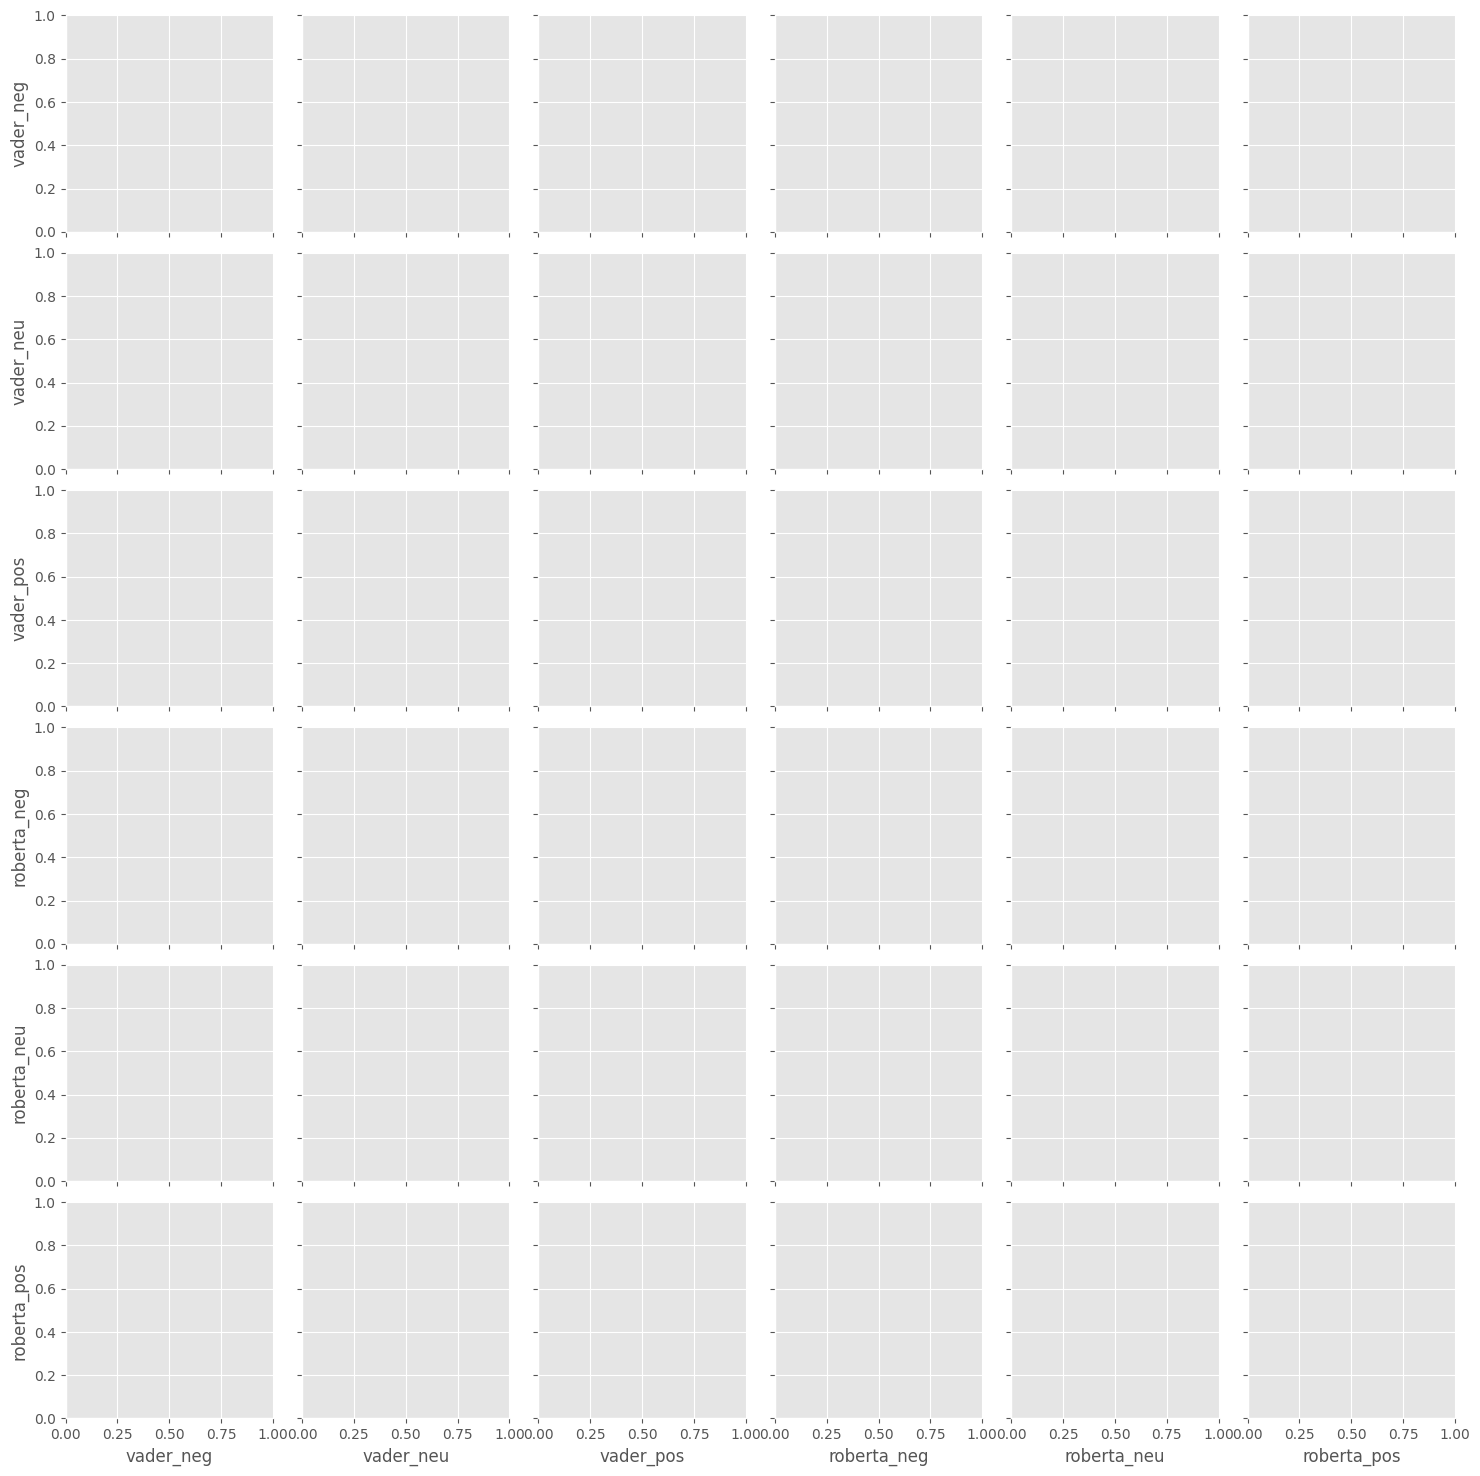

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg','vader_neu','vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='score',
             palette='tab10')
plt.show()

the transformers pipeline

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")